In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host="localhost",
                             user="root",
                             password='W7301@jqir#',
                             database='ecommerce')
cursor = db.cursor()

# Basic Queries

# 1. List all unique cities where customers are located.

In [7]:
query = """select distinct customer_city from customers"""
cursor.execute(query)
data = cursor.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# 2. Count the number of orders placed in 2017.

In [8]:
query1 = """select count(order_id) from orders where order_purchase_timestamp like '2017%' """
# select count(order_id) from orders where month(order_purchase_timestamp) = 2017;
cursor.execute(query1)
data = cursor.fetchall()
data

[(45101,)]

# 3. Find the total sales per category.

In [12]:
query2 = """select product_category , count(product_category) as count_product from order_items o inner join products p on o.product_id = p.product_id group by product_category"""
cursor.execute(query2)
data = cursor.fetchall()
data

[('HEALTH BEAUTY', 9670),
 ('sport leisure', 8641),
 ('Cool Stuff', 3796),
 ('computer accessories', 7827),
 ('Watches present', 5991),
 ('housewares', 6964),
 ('electronics', 2767),
 (None, 0),
 ('toys', 4117),
 ('bed table bath', 11115),
 ('Games consoles', 1137),
 ('automotive', 4235),
 ('Furniture Decoration', 8334),
 ('home appliances', 771),
 ('telephony', 4545),
 ('Construction Tools Construction', 929),
 ('perfumery', 3419),
 ('stationary store', 2517),
 ('Room Furniture', 503),
 ('Fashion Bags and Accessories', 2031),
 ('Garden tools', 4347),
 ('Fashion Underwear and Beach Fashion', 131),
 ('pet Shop', 1947),
 ('SIGNALIZATION AND SAFETY', 199),
 ('ELECTRICES 2', 238),
 ("Fashion Women's Clothing", 48),
 ('Bags Accessories', 1092),
 ('General Interest Books', 553),
 ('fixed telephony', 264),
 ('HOUSE PASTALS OVEN AND CAFE', 76),
 ('PCs', 203),
 ('technical books', 267),
 ('babies', 3065),
 ('musical instruments', 680),
 ('Furniture office', 1691),
 ('Construction Tools Garden',

# 4. Calculate the percentage of orders that were paid in installments.

In [13]:
query3 = """select concat((count(case when payment_installments > 1 then 1 end)/count(*))*100,'%') as Percentage_of_Orders_Installment from payments"""
cursor.execute(query3)
data = cursor.fetchall()
data

[('49.4176%',)]

# 5.Count the number of customers from each state.

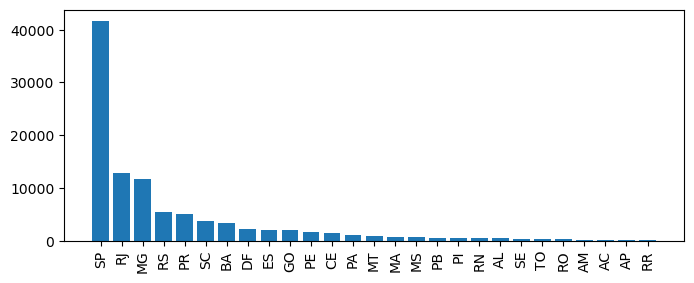

In [20]:
query5 = """select customer_state, count(customer_state) from customers group by customer_state"""
cursor.execute(query5)
data = cursor.fetchall()
df = pd.DataFrame(data,columns=["state","customer_count"])
df= df.sort_values(by="customer_count",ascending=False)
plt.figure(figsize=(8,3))
plt.bar(df["state"],df["customer_count"])
plt.xticks(rotation=90)
plt.show()

# -- Intermediate Queries

In [15]:
# -- 1. Calculate the number of orders per month in 2018

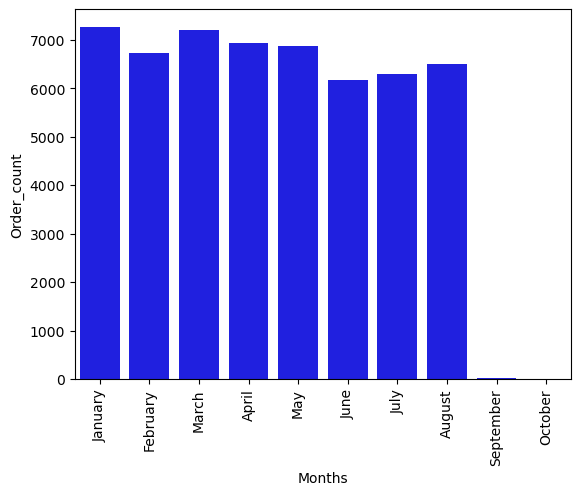

In [34]:
query6 = """select monthname(order_purchase_timestamp) as Month_of_2018, count(order_id) from orders where year(order_purchase_timestamp)=2018 group by Month_of_2018"""
cursor.execute(query6)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["Months","Order_count"])
o = ["January","February","March","April","May","June","July","August","September","October"]
sns.barplot(x=df["Months"],y=df["Order_count"], data=df, order=o,color='blue')
plt.xticks(rotation=90)
plt.show()
# select year(order_purchase_timestamp) as Years, month(order_purchase_timestamp) as month_of_year, count(order_id) from orders group by Years, month_of_year order by Years, month_of_year;

In [30]:
# -- 2. Find the average number of products per order, grouped by customer city.

In [39]:
query7 = """with count_per_order as (select o.customer_id, o.order_id, count(ot.order_item_id) as OC from orders o join order_items ot on o.order_id=ot.order_id group by o.customer_id, o.order_id)
select customers.customer_city, avg(count_per_order.OC) as average_orders from customers join count_per_order on customers.customer_id = count_per_order.customer_id group by customers.customer_city"""
cursor.execute(query7)
data = cursor.fetchall()
df = pd.DataFrame(data,columns=["customer_city","average_order_from_city"])
df.head(5)

,customer_city,average_order_from_city
0,sao paulo,1.1562
1,sao jose dos campos,1.1385
2,porto alegre,1.1749
3,indaial,1.1154
4,treze tilias,1.2727


# Calculate the percentage of total revenue contributed by each product category.

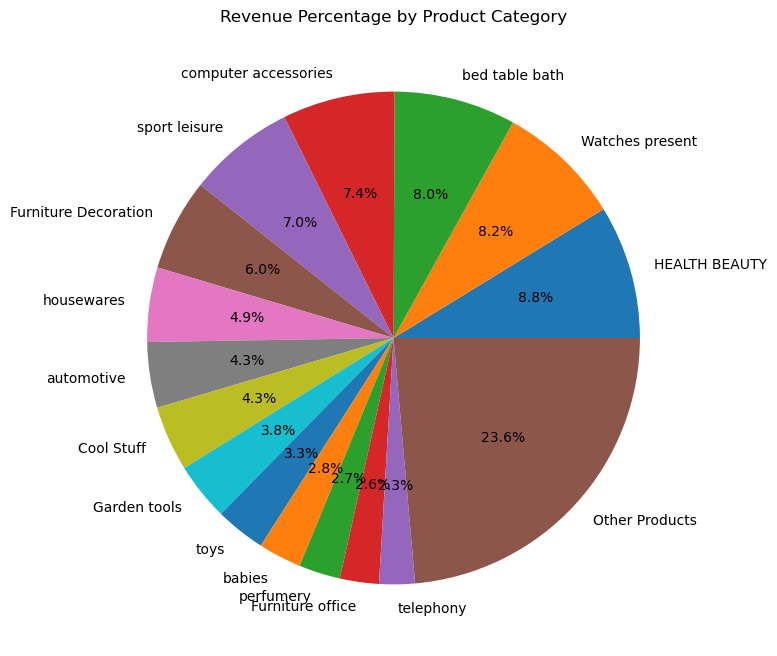

In [54]:
query8 = """select products.product_category, round(sum(order_items.order_item_id*price)/(select sum(payment_value) from payments)*100,2) as total_percentage_of_products  
from products join order_items on products.product_id=order_items.product_id group by product_category order by total_percentage_of_products desc"""
cursor.execute(query8)
data = cursor.fetchall()

df = pd.DataFrame(data, columns=["Category", "Revenue_Percentage"])

threshold = 2.0
major = df[df["Revenue_Percentage"]>=threshold]
minor = df[df["Revenue_Percentage"]<threshold]
others_total = minor["Revenue_Percentage"].sum()

if others_total > 0:
    others_row = pd.DataFrame([["Other Products", others_total]], columns = ["Category","Revenue_Percentage"])
    final_df = pd.concat([major,others_row],ignore_index=True)
else:
    final_df = major
plt.figure(figsize=(8,8))
plt.pie(final_df["Revenue_Percentage"],labels=final_df["Category"],autopct='%1.1f%%')
plt.xticks(rotation=90)
plt.title("Revenue Percentage by Product Category")
plt.show()


# 4. Identify the correlation between product price and the number of times a product has been purchased.

In [57]:
 query9 = """select
	p.product_category,
    
    count(oi.order_item_id) as num_of_purchases,
    round(avg(oi.price),2) as avg_price
from
	order_items oi join products p on oi.product_id=p.product_id
group by
p.product_category, oi.product_id"""
cursor.execute(query9)
data = cursor.fetchall()
df= pd.DataFrame(data,columns=["Category","Num_Purchase","avg_price"])

In [59]:
correlation_results={}

for category, group in df.groupby('Category'):
    if len(group)>1:
        corr = group['Num_Purchase'].corr(group['avg_price'])
        correlation_results[category]=corr
    else:
        correlation_results[category]=None
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Category','Price_purchase_correlation'])
print(correlation_df)

                     Category  Price_purchase_correlation
0   Agro Industria e Comercio                   -0.111914
1                         Art                   -0.024741
2             Arts and Crafts                    0.176171
3            Bags Accessories                   -0.049382
4                Blu Ray DVDs                    0.077482
..                        ...                         ...
68              sport leisure                   -0.052010
69           stationary store                   -0.055249
70            technical books                   -0.027179
71                  telephony                   -0.035506
72                       toys                   -0.049761

[73 rows x 2 columns]


C:\Users\rajag\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\rajag\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


# -ve means higher price and fewer purchase
# +ve means higher price and more purchases

In [61]:
#5. Calculate the total revenue generated by each seller, and rank them by revenue. 

In [67]:
 query10 = """select
 rank() over (order by sum(order_items.price) desc) as Rank_no,
 sellers.seller_id,round(sum(order_items.price),2) as total_revenue
 from sellers join order_items on sellers.seller_id=order_items.seller_id group by seller_id;"""
cursor.execute(query10)
data = cursor.fetchall()
df= pd.DataFrame(data,columns=["Rank","Seller Id","Total Revenue"])

In [71]:
# plt.figure(figsize=(8,8))
# plt.pie(df['Total Revenue'],labels=df['Rank'],autopct='%1.1f%%')
# plt.title("Revenue Generated by Each seller")
# plt.show()

Advanced Queries

# 1. Calculate the moving average of order values for each customer over their order history.

In [74]:
query11 = """select customer_id, order_purchase_timestamp, payment,avg(payment)
 over (partition by customer_id order by order_purchase_timestamp rows between 2 preceding
 and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""

In [75]:
cursor.execute(query11)
data = cursor.fetchall()
df= pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# 2. Calculate the cumulative sales per month for each year.

In [85]:
query12 = """with monthly_sales as (select year(orders.order_purchase_timestamp) as years,
 month(orders.order_purchase_timestamp) as months,
 SUM(payments.payment_value) AS monthly_sales
from
orders join payments on orders.order_id = payments.order_id 
group by years,months order by years,months)
 select years, months, round(monthly_sales,2), round(sum(monthly_sales) over (order by years, months),2) as CummlativeSales
 from monthly_sales order by years, months"""
cursor.execute(query12)
data = cursor.fetchall()
df = pd.DataFrame(data,columns=["Years", "Months","Sales","CummlativeSales"])

In [87]:
df.head(5)

,Years,Months,Sales,CummlativeSales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39


In [88]:
query13 = """with monthly_sales as (select year(orders.order_purchase_timestamp) as years,
 month(orders.order_purchase_timestamp) as months,
 SUM(payments.payment_value) AS monthly_sales
from
orders join payments on orders.order_id = payments.order_id 
group by years,months order by years,months)
 select years, months, round(monthly_sales,2) as monthly_sales,
 round(sum(monthly_sales) over (order by years, months),2) as CummlativeSales,
 round(avg(monthly_sales) over (order by years, months rows between unbounded preceding and current row),2) as RunningAverage
 from monthly_sales
 union all
 select  null as years, null as months, round(sum(monthly_sales),2) as monthly_sales,
 null as CummlativeSales, null as runningAverage from monthly_sales
 order by
 years is Null, years, months"""
cursor.execute(query13)
data = cursor.fetchall()
df = pd.DataFrame(data,columns=["Years", "Months","MonthlySales","CummlativeSales","Running Average"])

In [89]:
df.head(5)

,Years,Months,MonthlySales,CummlativeSales,Running Average
0,2016.0,9.0,252.24,252.24,252.24
1,2016.0,10.0,59090.48,59342.72,29671.36
2,2016.0,12.0,19.62,59362.34,19787.45
3,2017.0,1.0,138488.04,197850.38,49462.60
4,2017.0,2.0,291908.01,489758.39,97951.68


In [90]:
df.isnull().sum()

Years              1
Months             1
MonthlySales       0
CummlativeSales    1
Running Average    1
dtype: int64

In [91]:
df_cleaned = df[df["Years"].notnull()]
df_cleaned["Date"] = pd.to_datetime(df_cleaned[["Years","Months"]].assign(day=1))

C:\Users\rajag\AppData\Local\Temp\ipykernel_23484\2645063824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Date"] = pd.to_datetime(df_cleaned[["Years","Months"]].assign(day=1))


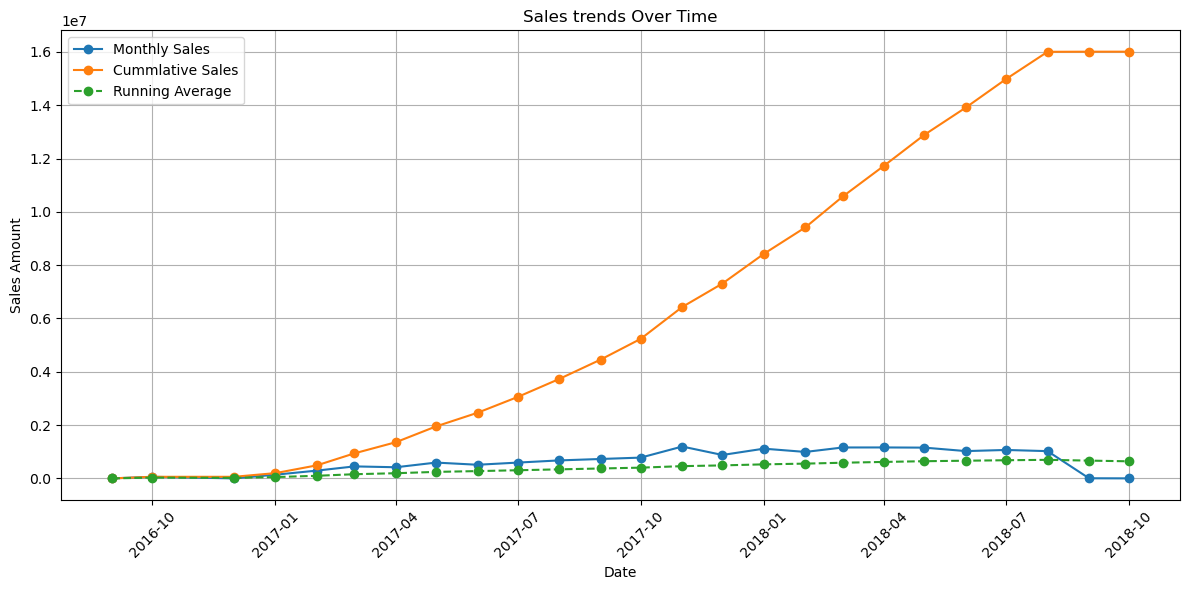

In [94]:
plt.figure(figsize=(12,6))
plt.plot(df_cleaned["Date"], df_cleaned["MonthlySales"], label="Monthly Sales", marker='o')
plt.plot(df_cleaned["Date"], df_cleaned["CummlativeSales"], label="Cummlative Sales", marker='o')
plt.plot(df_cleaned["Date"], df_cleaned["Running Average"], label="Running Average", linestyle='--',marker='o')
plt.title("Sales trends Over Time")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [95]:
print(df_cleaned[["MonthlySales", "CummlativeSales", "Running Average"]].dtypes)
print(df_cleaned.head())

MonthlySales       float64
CummlativeSales    float64
Running Average    float64
dtype: object
    Years  Months  MonthlySales  CummlativeSales  Running Average       Date
0  2016.0     9.0        252.24           252.24           252.24 2016-09-01
1  2016.0    10.0      59090.48         59342.72         29671.36 2016-10-01
2  2016.0    12.0         19.62         59362.34         19787.45 2016-12-01
3  2017.0     1.0     138488.04        197850.38         49462.60 2017-01-01
4  2017.0     2.0     291908.01        489758.39         97951.68 2017-02-01


# 3. Calculate the year-over-year growth rate of total sales.

In [98]:
query14 = """with yearly_sales_table as (select year(orders.order_purchase_timestamp) as years, round(sum(payments.payment_value),2) as yearly_sales from
 orders join payments on orders.order_id=payments.order_id group by years order by years)
 select years, ((yearly_sales - lag(yearly_sales) over (order by years))/lag(yearly_sales) over (order by years))*100
 from yearly_sales_table"""
cursor.execute(query14)
data = cursor.fetchall()
df = pd.DataFrame(data,columns = ["Years", "YoY%"])

In [99]:
df

,Years,YoY%
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# 4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [102]:
query15 = """with first_order as (select customer_id, min(order_purchase_timestamp) as first_purchase
from orders group by customer_id),
next_orders as (
select o.customer_id, o.order_purchase_timestamp, f.first_purchase
from orders o  join first_order f on o.customer_id=f.customer_id where o.order_purchase_timestamp > f.first_purchase
and o.order_purchase_timestamp <= date_add(f.first_purchase, interval 6 month)
),
retained_customers as (
select distinct customer_id from next_orders)
select (select count(*) from retained_customers) * 100.0 / (select count(*) from first_order) as retention_rate;"""
cursor.execute(query15)
data = cursor.fetchall()
data

[(Decimal('0.00000'),)]

# 5. Identify the top 3 customers who spent the most money in each year.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

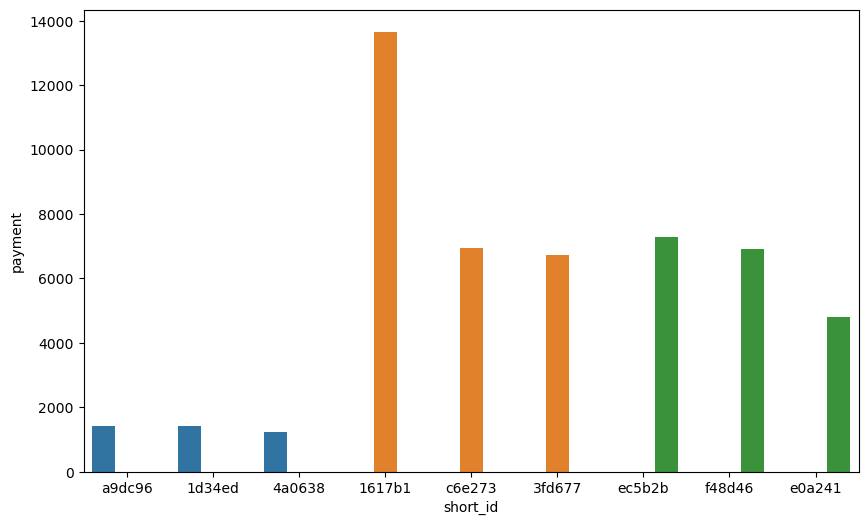

In [108]:
query16 = """select years, customer_id, payment, d_rank from
(select year(orders.order_purchase_timestamp) as years, orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over (partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a where d_rank <=3;"""
cursor.execute(query16)
data = cursor.fetchall()
df = pd.DataFrame(data, columns=["years","id","payment","rank"])
df["id"] = df["id"].astype(str)
df["short_id"] = df["id"].apply(lambda x: x[:6]) 

plt.figure(figsize=(10, 6))
sns.barplot(x="short_id", y="payment", data=df, hue="years")
plt.xticks(rotation=90)
plt.title("Top 3 Customers by Year")
plt.xlabel("Customer ID (shortened)")
plt.ylabel("Total Payment (₹)")
plt.legend(title="Year")
plt.tight_layout()
plt.show()